In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset profile

**Dataset** : 

Airbnb data for 250,000+ listings across 10 major cities, along with ~5 million guest reviews.

In [2]:
#load dataset
df = pd.read_csv('01_DATA/Listings.csv',low_memory=False,encoding="ISO-8859-1")

In [3]:
#change date columns to datetime type
df['host_since']= pd.to_datetime(df['host_since'])
#or
#df = pd.read_csv('01_DATA/Listings.csv',low_memory=False,encoding="ISO-8859-1",parse_dates=['host_since'])

Filter the data down to rows where the city is Paris 

In [4]:
 #keep only the columns ‘host_since’, ‘neighbourhood’, ‘city’, ‘accommodates’, and ‘price’
df_paris = df.query('city == "Paris"').filter(items= ['host_since', 'neighbourhood', 'city', 'accommodates', 'price'])

QA the Paris listings data: 
* check for missing values
* calculate the minimum, maximum, and average for each numeric field

In [5]:
#missing values by columns
df_paris.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [6]:
#metrics for 'accommodates' and 'price'
df_paris.describe().filter(['min', 'max', 'mean' ], axis = 0)

,accommodates,price
min,0.000000,0.000000
max,16.000000,12000.000000
mean,3.037997,113.096445


### Preparation for visualization

Producing DataFrames that will be used in visualizations.

* average price by neighbourghood

In [7]:
paris_listings_neighbourhood = pd.DataFrame(
    {'price':df_paris.groupby('neighbourhood')['price'].mean()}).sort_values('price')

In [8]:
paris_listings_neighbourhood

,price
neighbourhood,
Menilmontant,74.942257
Buttes-Chaumont,82.690182
Buttes-Montmartre,87.209479
Reuilly,89.058402
Popincourt,90.559459
Gobelins,98.110184
Observatoire,101.866801
Batignolles-Monceau,102.612702
Enclos-St-Laurent,102.967156


* average price by accommodation for Paris' most expensive neighbourhood

In [9]:
most_expensive_nbh = paris_listings_neighbourhood.reset_index()['neighbourhood'][len(paris_listings_neighbourhood)-1]

In [10]:
serie_accommodation = df_paris[df_paris['neighbourhood'] == most_expensive_nbh].groupby('accommodates')['price'].mean()

In [11]:
paris_listings_accomodations = pd.DataFrame({'price': serie_accommodation}).sort_values(by = 'price')
paris_listings_accomodations.head()

,price
accommodates,
0,0.000000
1,79.522222
3,152.828767
2,155.103352
4,212.096070


*  average price and count of rows representing the number of new hosts

In [12]:
paris_listings_over_time = (
    df_paris
    .set_index('host_since')
    .resample('Y')
    .agg({
        'price':'mean',
        'neighbourhood':'count'
    })
    .rename(columns = {'neighbourhood':'new_host_count'})
)

In [13]:
paris_listings_over_time.head()

,price,new_host_count
host_since,,
2008-12-31,77.750000,4
2009-12-31,159.641509,106
2010-12-31,125.031250,416
2011-12-31,124.828230,1339
2012-12-31,111.578615,4592


### Visualization

Build visuals to show the number of new hosts by year, overall average price by year and neighborhood, and average price for various types of listings in Paris' most expensive neighborhood.

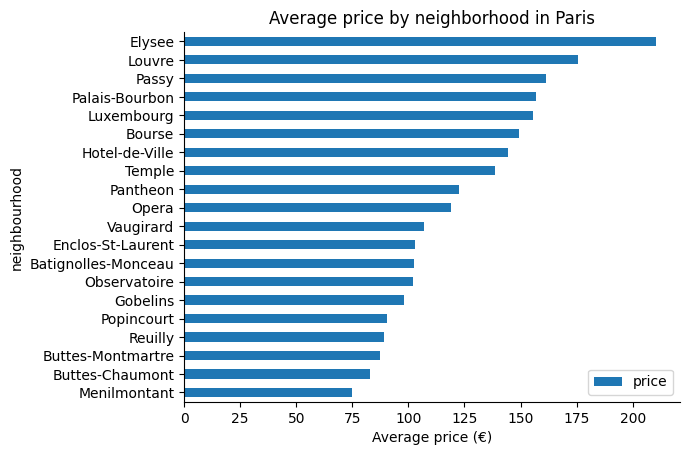

In [14]:
paris_listings_neighbourhood.plot.barh(y = "price", 
                                            xlabel = "Average price (€)",
                                            title = "Average price by neighborhood in Paris")
sns.despine()

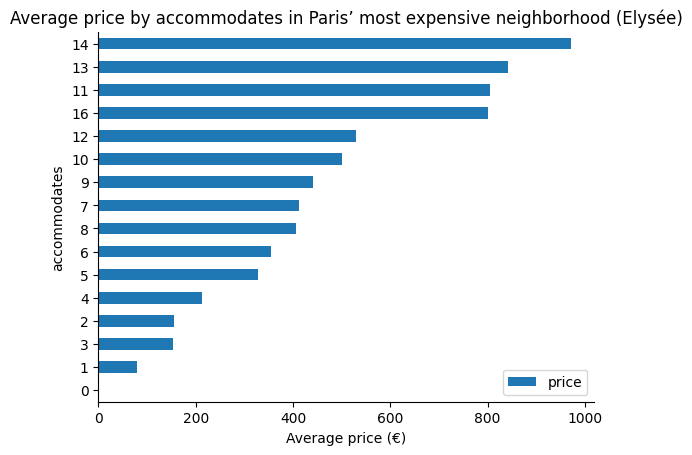

In [15]:
paris_listings_accomodations.plot.barh(y = "price", 
                                            xlabel = "Average price (€)",
                                            title = "Average price by accommodates in Paris’ most expensive neighborhood (Elysée)")
sns.despine()

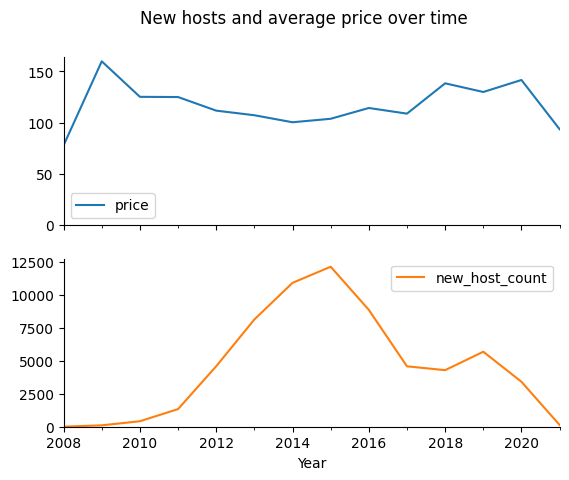

In [16]:
paris_listings_over_time.plot.line(subplots = True, 
                                   xlabel = 'Year', 
                                   ylim = 0, 
                                   title = "New hosts and average price over time" )
sns.despine()

The strictier 2015 regulations led to a drop of new hosts and higher prices.